In [2]:
import pandas as pd
import numpy as np

In [3]:
catB_dataset = '/content/catB_train.parquet'

In [4]:
df = pd.read_parquet(catB_dataset)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.head()


,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN


In [6]:
#DATA CLEANING & PROCESSING
from sklearn.impute import SimpleImputer
# Convert target col to 0 or 1
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)


y = df["f_purchase_lh"]
X = df.drop(columns=['f_purchase_lh'])

#Dropping columns comprising mostly of empty cells
threshold = 0.8
# Calculate the percentage of missing values in each column
missing_percentages = X.isnull().mean()
# Identify columns exceeding the threshold
drop_columns = missing_percentages[missing_percentages > threshold].index.tolist()
print(drop_columns)
df_filtered = X.drop(drop_columns, axis=1)

#Dropping Columns comprising entirely zeros
zero_columns = df_filtered.columns[(df_filtered == 0).all()]
print(zero_columns)

#Dropping columns comprising of 80% empty cells & zeros
df_filtered = df_filtered.drop(df_filtered.loc[:,'lapse_ape_ltc_1280bf': 'lapse_ape_grp_fd3bfb'], axis = 1)
df_filtered = df_filtered.drop(df_filtered.loc[:,'lapse_ape_lh_947b15': 'lapse_ape_32c74c'], axis = 1)

#check
feature_name = 'lapse_ape_grp_de05ae'

if feature_name in zero_columns:
    print(f"The feature '{feature_name}' is present in the DataFrame.")
else:
    print(f"The feature '{feature_name}' is not present in the DataFrame.")
# Drop the identified columns
df_data = df_filtered.drop(columns=zero_columns)

#Dropping columns comprising mostly of cells containing 9999: for features n_months_last_bought....
# Identify columns with more than 80% values equal to 9999
nine_columns = df_data.columns[df_data.apply(lambda col: (col.astype(str) == '9999').mean()) > 0.8]
print(nine_columns)
# Drop the identified columns
df_processed = df_data.drop(columns=nine_columns)


# Apply One-Hot Encoding for specified features
categorical_features = ['race_desc', 'clttype', 'stat_flag', 'cltsex_fix', 'annual_income_est', 'hh_size_est' ]
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, prefix=categorical_features)
print(df_encoded.columns)

# Fill null values in numeric columns with the median value
numeric_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns
df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].median())

#drop non-numeric columns
non_numeric_cols = ['clntnum', 'ctrycode_desc', 'min_occ_date', 'cltdob_fix']
Main_df = df_encoded.drop(columns=non_numeric_cols)
print(Main_df.columns)
print(Main_df.shape)


#Identify X & y
X = Main_df
# Convert the X DataFrame to a numerical data type
X = X.astype(float)


# Check for missing values
missing_values = X.isnull().sum().sum()

# If missing values exist, impute them
if missing_values > 0:
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


['f_ever_declined_la', 'recency_cancel', 'tot_cancel_pols', 'flg_affconnect_show_interest_ever', 'flg_affconnect_ready_to_buy_ever', 'flg_affconnect_lapse_ever', 'affcon_visit_days', 'n_months_since_visit_affcon', 'clmcon_visit_days', 'recency_clmcon', 'recency_clmcon_regis', 'hlthclaim_amt', 'recency_hlthclaim', 'hlthclaim_cnt_success', 'recency_hlthclaim_success', 'hlthclaim_cnt_unsuccess', 'recency_hlthclaim_unsuccess', 'flg_hlthclaim_839f8a_ever', 'recency_hlthclaim_839f8a', 'flg_hlthclaim_14cb37_ever', 'recency_hlthclaim_14cb37', 'giclaim_amt', 'recency_giclaim', 'giclaim_cnt_success', 'recency_giclaim_success', 'giclaim_cnt_unsuccess', 'recency_giclaim_unsuccess', 'flg_gi_claim_29d435_ever', 'flg_gi_claim_058815_ever', 'flg_gi_claim_42e115_ever', 'flg_gi_claim_856320_ever']
Index(['ape_gi_42e115', 'ape_ltc_1280bf', 'ape_inv_dcd836', 'ape_lh_d0adeb',
       'ape_gi_a10d1b', 'ape_gi_29d435', 'ape_gi_856320', 'ape_gi_058815',
       'ape_32c74c', 'sumins_gi_42e115', 'sumins_ltc_1280

Class Distribution Before SMOTE: Counter({0.0: 13834, 1.0: 559})
Class Distribution After SMOTE: Counter({1.0: 11764, 0.0: 10235})
Selected Feature Indices: [  6  10  12  14  15  17  18  23  24  26  27  51  55  60  86  91  95  96
  99 100 128 137 141 142 147 151 156 159 166 167 168 169 170 175 176 182]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Accuracy: 0.7686363636363637
Confusion Matrix:
 [[1449  619]
 [ 399 1933]]


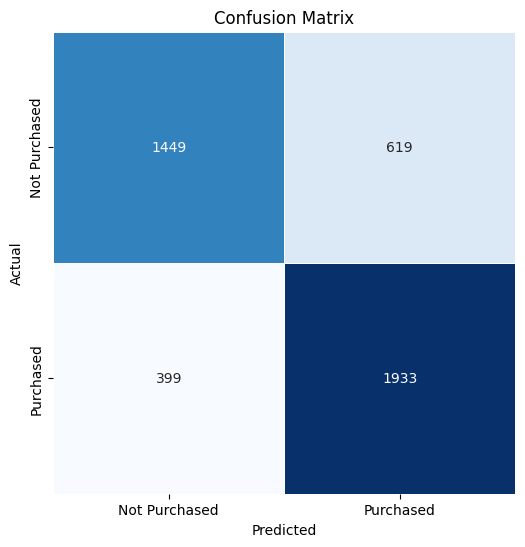

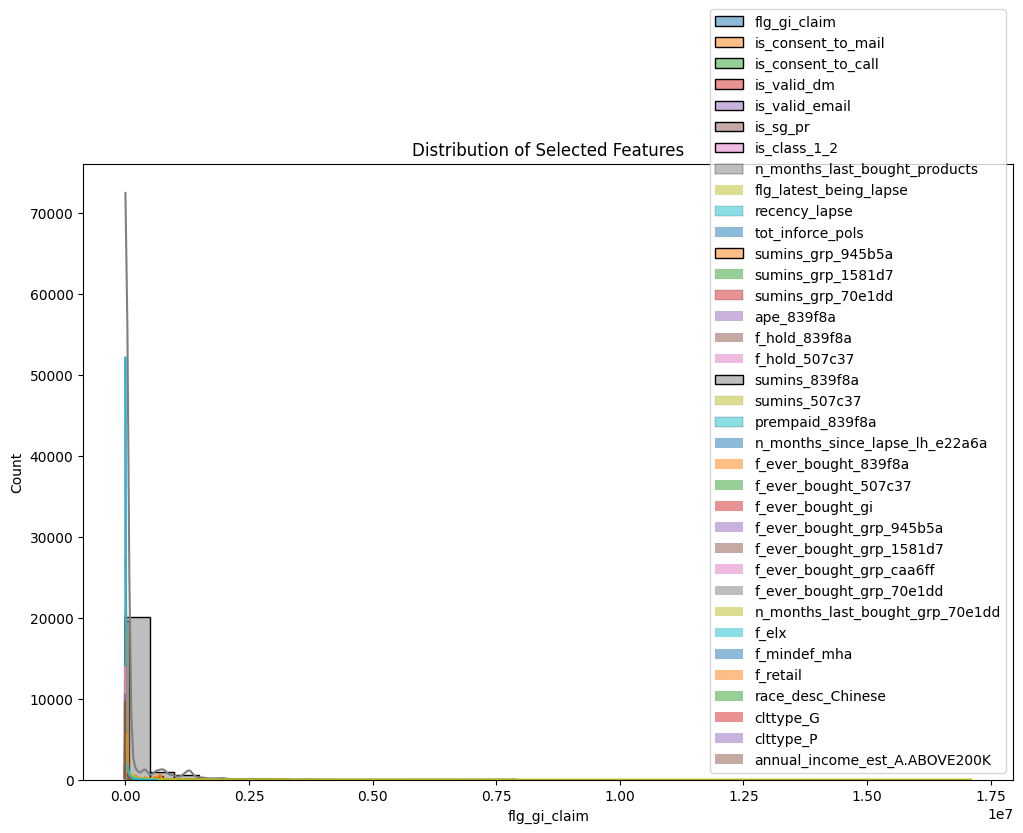

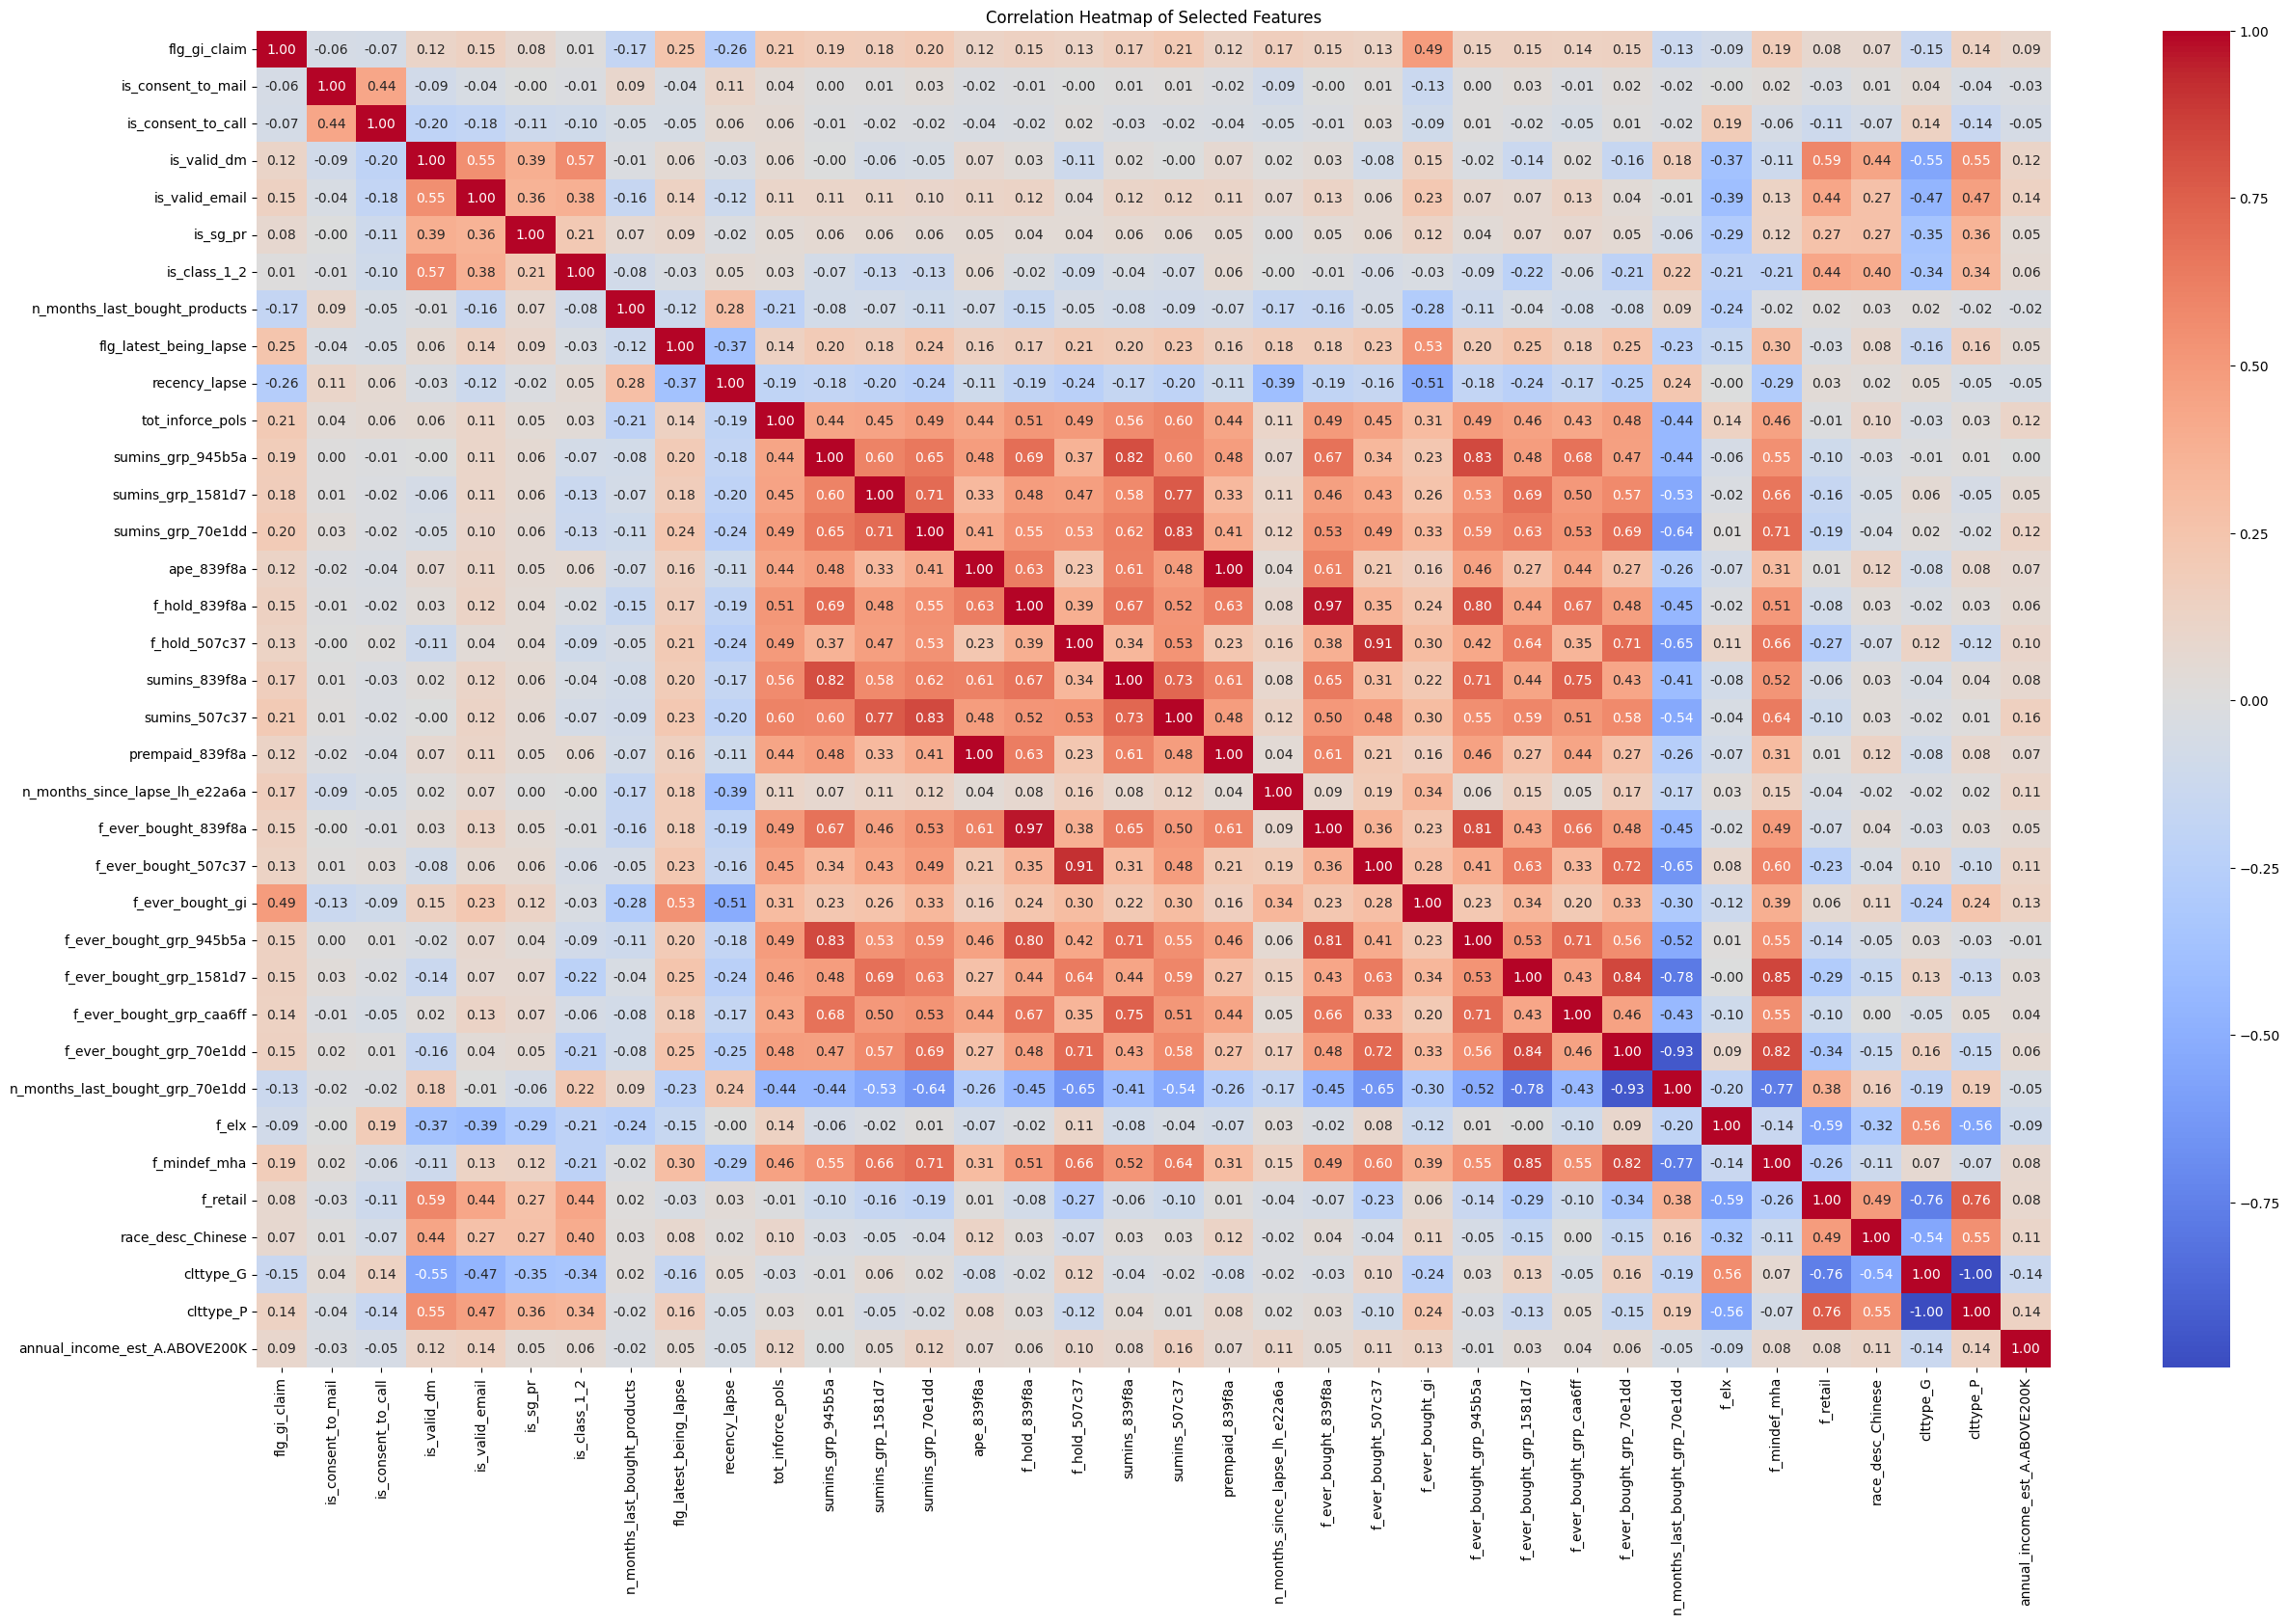

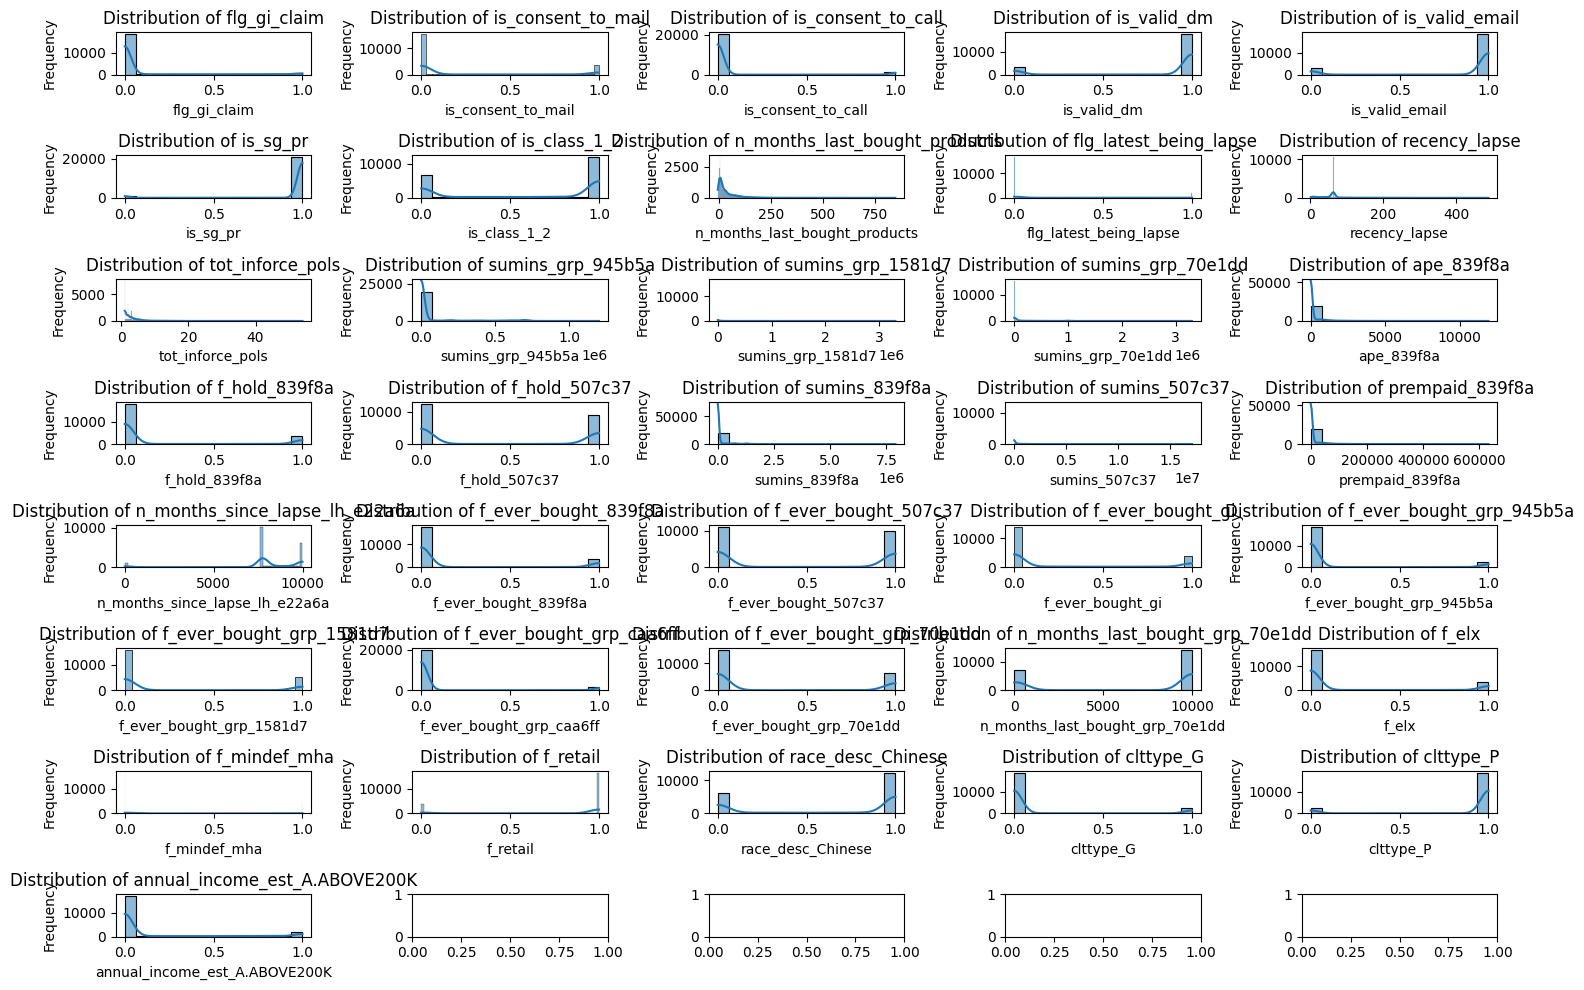

In [26]:
#A) APPLYING SMOTE+ENN TO DATASETS TO HANDLE UNBALANCED DATA
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import  mean_absolute_error
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#splitting data set into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#add X_resampled & y_resampled
#display class dist. before applying SMOTE
counter_before = Counter(y_train)
print('Class Distribution Before SMOTE:', counter_before)

#applying SMOTE-ENN to create synthetic instances for the minority class
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
# Create DataFrames for the resampled data
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.Series(y_resampled, name=y_train.name)

# Display class distribution after applying SMOTE
counter_after = Counter(y_resampled)
print('Class Distribution After SMOTE:', counter_after)

# Create DataFrames for the original training data
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
y_train_df = pd.Series(y_train, name=y_train.name)

# Concatenate the DataFrames to create main_df
main_df = pd.concat([X_resampled_df, y_resampled_df, X_train_df, y_train_df], axis=1)

#____________________________________________________________________________________________________________-

#B)FEATURE SELECTION
#Correlation-based
threshold = 0.15 # Adjust this threshold as needed

# Assuming X_resampled and y_resampled are numpy arrays
correlation_matrix = np.corrcoef(X_resampled, y_resampled, rowvar=False)
selected_features = np.where(np.abs(correlation_matrix[-1, :-1]) > threshold)

# Clip feature indices to ensure they are within a valid range
selected_features = np.clip(selected_features, 0, X.shape[1] - 1)
selected_feature_indices = selected_features[0]
X_selected = main_df.iloc[:, selected_feature_indices]

# Display the selected feature indices
print("Selected Feature Indices:", selected_feature_indices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Feature scaling using Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
predictions = logistic_model.predict(X_test_scaled)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False,
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#___________________________________________________________________________________________________________________________

#VISUALIZATION OF SELECTED FEATURES

# Distribution curves for selected features
plt.figure(figsize=(12, 8))
for feature in X_selected.columns:
    sns.histplot(X_selected[feature], kde=True, label=feature, alpha=0.5)
plt.title('Distribution of Selected Features')
plt.legend()
plt.show()


# Plot heatmap for correlation matrix of selected features
correlation_matrix_selected = X_selected.corr()
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

#Plot distribution curves
#segmenting features into those to plot countplots and those to plot distribution curves
# Get the number of features
num_features = X_selected.shape[1]

# Define the number of rows and columns for subplots
num_rows = 8  # Adjust this based on the number of features you have
num_cols = num_features // num_rows + (num_features % num_rows > 0)

# Create a new figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each feature
for i, feature in enumerate(X_selected.columns):
    # Select the subplot for the current feature
    ax = axes[i]

    # Plot histogram for the selected feature
    sns.histplot(X_selected[feature], kde=True, ax=ax)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Adjust the layout of subplots for better spacing
plt.tight_layout()
plt.show()




Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time=   1.4s
[CV] END max_depth=4, mi

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7277272727272728
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.88      0.75      2068
         1.0       0.85      0.59      0.70      2332

    accuracy                           0.73      4400
   macro avg       0.75      0.74      0.72      4400
weighted avg       0.76      0.73      0.72      4400



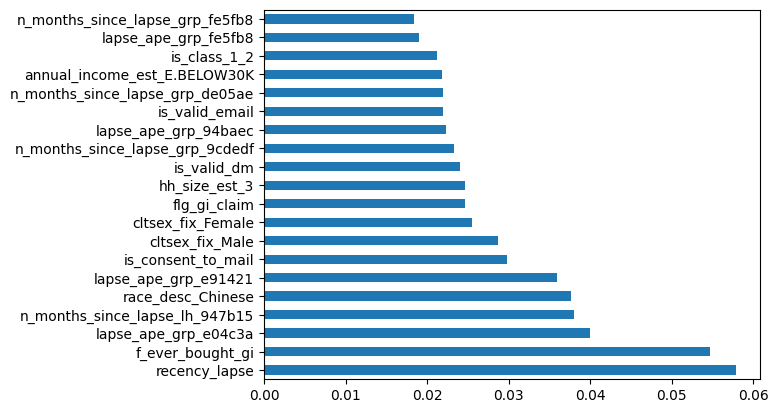

In [48]:
#FEATURE SELECTION:
!pip install lime
import lime
from lime import lime_tabular
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#Random-Forest Based
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


#finding the best model
def grid_search(model, parameters, X_train, y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,y_train)
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_resampled, y_resampled)

# Get feature importances
importances = rf_optimal_model.feature_importances_

#List of columns and their importances
importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}

# Create a DataFrame with feature names and importances
importance_df = pd.DataFrame(importance_dict)


#Bar Plot Visualization
(pd.Series(rf_optimal_model.feature_importances_, index=X_resampled.columns)
   .nlargest(50)
   .plot(kind='barh'))

def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_resampled),
    feature_names=X_resampled.columns,
    class_names = ['Not Purchased', 'Purchased'],
    mode='classification')

  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10],
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

interpret_with_lime(rf_optimal_model,X_test)

#Logistic Regression Prediction Model

# Step 1: Select important features
selected_features = importance_df.nlargest(20, 'Feature Importance')['Feature']
# Step 2: Create a subset of data
X_selected = X_resampled[selected_features]
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)
# Step 4: Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [15]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Apply KMeans clustering to group features into clusters
n_clusters = 4  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_resampled)

# Get the cluster assignments for each feature
feature_clusters = kmeans.labels_

# Select representative features from each cluster using RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
sfm = SelectFromModel(clf, threshold=0.3)

selected_features = []

for cluster_id in range(n_clusters):
    # Identify features in the current cluster
    cluster_features = np.where(feature_clusters == cluster_id)[0]

    if len(cluster_features) > 0:  # Check if there are features in the current cluster
        # Ensure that indices are within the bounds of the DataFrame
        valid_indices = np.intersect1d(cluster_features, np.arange(X_resampled.shape[1]))

        if len(valid_indices) > 0:  # Check if there are valid indices
            # Extract data corresponding to the current cluster
            cluster_data = X_resampled.iloc[:, valid_indices]

            # Train a RandomForest model on the cluster data
            clf.fit(cluster_data, y_resampled)

            # Use SelectFromModel to automatically select features based on importance
            sfm.fit(cluster_data, y_resampled)

            # Get selected features
            selected_cluster_features = cluster_data.columns[sfm.get_support()]

            # Add selected features to the final list
            selected_features.extend(selected_cluster_features)

# Display the selected features
print("Selected Features:", selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Selected Features: ['annual_income_est_E.BELOW30K', 'lapse_ape_grp_94baec', 'lapse_ape_grp_fe5fb8']


In [46]:
#FEATURE SELECTION USING RFE FOR CLASSIFICATION
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, 10):
  rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
  model = DecisionTreeClassifier()
  models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# define dataset
X, y = X_resampled, y_resampled
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


KeyboardInterrupt: 